**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

* -`Name` — название игры
-`Platform` — платформа
-`Year_of_Release` — год выпуска
-`Genre` — жанр игры
-`NA_sales` — продажи в Северной Америке (миллионы проданных копий)
-`EU_sales` — продажи в Европе (миллионы проданных копий)
-`JP_sales` — продажи в Японии (миллионы проданных копий)
-`Other_sales` — продажи в других странах (миллионы проданных копий)
-`Critic_Score` — оценка критиков (максимум 100)
-`User_Score` — оценка пользователей (максимум 10)
-`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Откртытие файла с данными и изучение общей информации

In [2]:
#подключение необходимых библиотек
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#открытие файла и вывод первых строк
try:
    data = pd.read_csv('C:/Users/misha/Downloads/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')
        

In [4]:
#просмотр первых строк
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Подготовка данных

### Замена названия столбцов

In [5]:
#нижний регистр в названии столбцов
data.columns = data.columns.str.lower()

In [6]:
#просмотр
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование данных в нужные типы

In [7]:
#получение информации о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
#сколько всего пропусков в столбцах
print('пропусков в year_of_release:', data['year_of_release'].isna().sum())
print('пропусков в genre:', data['genre'].isna().sum())
print('пропусков в critic_score:', data['critic_score'].isna().sum())
print('пропусков в user_score:', data['user_score'].isna().sum())
print('пропусков в rating:', data['rating'].isna().sum())

пропусков в year_of_release: 269
пропусков в genre: 2
пропусков в critic_score: 8578
пропусков в user_score: 6701
пропусков в rating: 6766


In [9]:
#заполнение пропущеннных значений в year_of_release на несуществующий 2030 год, например
data['year_of_release'] = data['year_of_release'].fillna(2030)

#изменение типа данных year_of_release
data['year_of_release'] = data['year_of_release'].astype(int)
data['year_of_release'] = data['year_of_release'].astype(str)
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y-%m-%d').dt.year

#изменение типа данных user_score
print(data['user_score'].unique())
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


По полученной информации можно сделать вывод, что столбцы **year_of release** и **user_score** должны быть приведены к другому типу, дата и число соответственно, так как содержат информацию о годе выпуска и рейтинге у пользователей. Пропуски есть в оценках, рейтинге, дате выпуска. 

### Обработка пропусков

In [10]:
#подсчет дубликатов
data.duplicated().sum()

0

In [11]:
#замена пропущенных значений в Rating на пустую строку
print(data['rating'].unique())
data['rating'] = data['rating'].fillna(value = '')

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Пропущенные значения в столбце **rating** заполним пустой строчкой. Пропуски в **year** заполним несуществующим 2030 годом, так как скорее всего данные игры только готовятся к выходу. Пропуски в рейтингах заполнять нет смысла, так как эти данные не нужны для данного исследования.

Пропуски в **year** появились скорее всего из-за того, что данные игры только готовятся к выходу. Пропуски в рейтингах появились по той же причине у игр еще невышедших.

В столбце **user_score** найдено значение tbd, что в переводе можно понять как "на стадии оценки".

### Подсчет суммарных продаж во всех регионах

In [12]:
#общие продажи
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [13]:
#просмотр
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,,31.38


## Исследовательский анализ данных
### Сколько игр выпускалось в разные годы

<AxesSubplot:xlabel='year_of_release'>

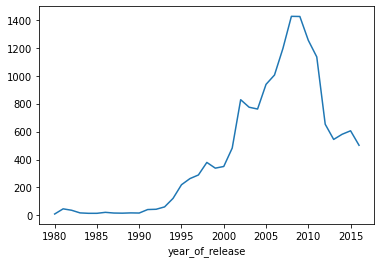

In [14]:
data.query('year_of_release != 2030') \
.groupby('year_of_release')['name'].count().plot(kind='line')

In [15]:
data.query('year_of_release != 2030') \
.groupby('year_of_release')['name'].count().sort_values(ascending=False)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64

<AxesSubplot:xlabel='year_of_release'>

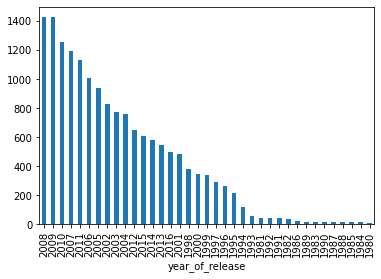

In [16]:
data.query('year_of_release != 2030') \
.groupby('year_of_release')['name'].count().sort_values(ascending=False).plot(kind='bar')

Пик выпускаемых игр пришелся на 2008-2011 года, 1990-2008 подъем количества выпускаемых игр.

Для прогноза на 2017 год важен период 2003-2015 года, так как большая часть старых платформ уже исчезла к 2016 году, а новые платформы еще только набирают обороты.

### Изменение продаж по платформам.

In [17]:
data.groupby(by='platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).head()

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


Наиболее продаваемыми стали игры на платформе **PS2(1255.77), X360(971.42), PS3(939.65), после уже Wii(907.51), DS(806.12).**

<AxesSubplot:title={'center':'PS2'}, xlabel='year_of_release'>

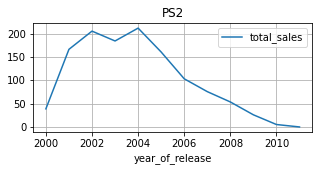

In [18]:
#гистограммы суммарных продаж по годам 

#PS2
data.query('platform == "PS2" and year_of_release != 2030') \
.pivot_table(index='year_of_release', values='total_sales', aggfunc=sum) \
.plot(kind='line', figsize=(5, 2), title='PS2', grid=True)

Пик продаж для данной платформы пришелся на период 2002-2004 года, после чего начался спад.

<AxesSubplot:title={'center':'X360'}, xlabel='year_of_release'>

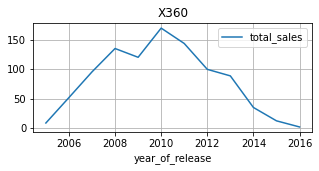

In [19]:
#X360
data.query('platform == "X360" and year_of_release != 2030') \
.pivot_table(index='year_of_release', values='total_sales', aggfunc=sum) \
.plot(kind='line', figsize=(5, 2), title='X360', grid=True)

Пик продаж для данной платформы пришелся на период 2009-2010 года, после начался спад.

<AxesSubplot:title={'center':'PS3'}, xlabel='year_of_release'>

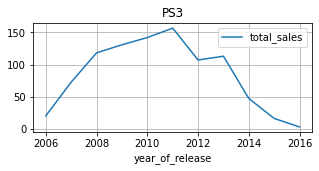

In [20]:
#PS3
data.query('platform == "PS3" and year_of_release != 2030') \
.pivot_table(index='year_of_release', values='total_sales', aggfunc=sum) \
.plot( kind='line', figsize=(5, 2), title='PS3', grid=True)

Пик продаж для данной платформы пришелся на период 2008-2011 года, после начался спад, с небольшим подьемом в 2013.

<AxesSubplot:title={'center':'DS'}, xlabel='year_of_release'>

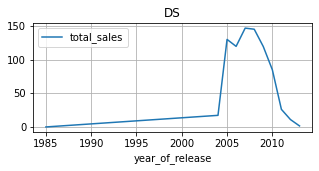

In [21]:
#DS
data.query('platform == "DS" and year_of_release != 2030') \
.pivot_table(index='year_of_release', values='total_sales', aggfunc=sum) \
.plot(kind='line',figsize=(5, 2), grid=True, title='DS')

Данные 1985-2000 похожи на аномалию, стоит проверить.

<AxesSubplot:title={'center':'DS'}, xlabel='year_of_release'>

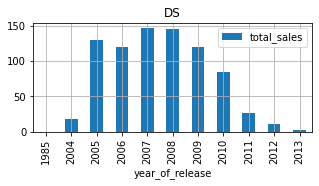

In [22]:
data.query('platform == "DS" and year_of_release != 2030') \
.pivot_table(index='year_of_release', values='total_sales', aggfunc=sum) \
.plot(kind='bar',figsize=(5, 2), grid=True, title='DS')

Данные до 2004 года отсутствуют, так как платформа еще не появилась. Пик продаж для данной платформы пришелся на период 2004-2007 года, после начался спад.

<AxesSubplot:title={'center':'Wii'}, xlabel='year_of_release'>

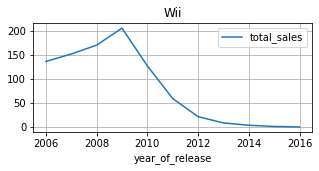

In [23]:
#Wii
data.query('platform == "Wii" and year_of_release != 2030') \
.pivot_table(index='year_of_release', values='total_sales', aggfunc=sum) \
.plot(kind='line', figsize=(5, 2), grid=True, title='Wii')

Пик продаж для данной платформы пришелся на 2009 год, после начался резкий спад.

### За какой характерный срок появляются новые и исчезают старые платформы?

In [24]:
#просчет среднего времени для топ-5 платформ
#PS2
PS2 = data.query('platform == "PS2" and year_of_release != 2030')
PS2_max = PS2['year_of_release'].max()
PS2_min = PS2['year_of_release'].min()
PS2_sr = PS2_max - PS2_min

#X360
X360 = data.query('platform == "X360" and year_of_release != 2030')
X360_max = X360['year_of_release'].max()
X360_min = X360['year_of_release'].min()
X360_sr = X360_max - X360_min

#PS3
PS3 = data.query('platform == "PS3" and year_of_release != 2030')
PS3_max = PS3['year_of_release'].max()
PS3_min = PS3['year_of_release'].min()
PS3_sr = PS3_max - PS3_min

#Wii
Wii = data.query('platform == "Wii" and year_of_release != 2030')
Wii_max = Wii['year_of_release'].max()
Wii_min = Wii['year_of_release'].min()
Wii_sr = Wii_max - Wii_min

#DS
DS = data.query('platform == "DS" and year_of_release != 2030')
DS_max = DS['year_of_release'].max()
DS_min = DS['year_of_release'].min()
DS_sr = DS_max - DS_min

all_mean = (PS2_sr + X360_sr + PS3_sr + Wii_sr + DS_sr) / 5
print("Средний срок появления и исчезновая топ-5 платформ: ", all_mean)

Средний срок появления и исчезновая топ-5 платформ:  14.0


Средний срок появления и исчезновая платформ равен 14 годам. За исключение Nintendo DS(1985), большая часть платформ появилась в 2006 году и постепенно ушли в неведение к 2016 году.

**Общий вывод: срок жизни платформ периода 2006-2016 годов (14 лет). Многие кампании перевыпустили свои платформы, заменив их старых собратьев( Sony PS заменили PS2, PS2 на PS3, Nintendo NES на SNES).**

Определим, какие платформы все еще живы в 2016 году. А так же выберем актуальный период.

In [25]:
data_2016 = data[(data.year_of_release == 2016) & (data.total_sales > 0)]
data_2016['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

В 2016 году мы видим следующие платформы: **PS4, 3DS, XOne, WiiU, PS3, PC, X360, PSV, Wii.**

<AxesSubplot:xlabel='year_of_release'>

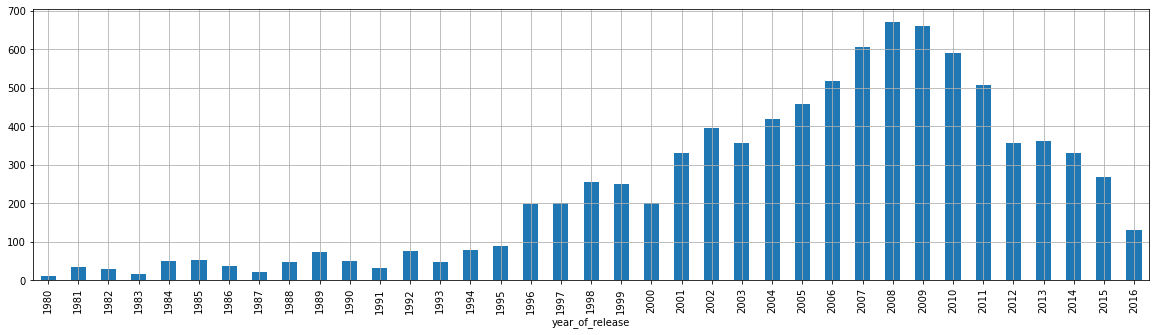

In [26]:
data.query('year_of_release != 2030') \
.groupby('year_of_release')['total_sales'].sum().plot(grid=True, kind='bar',figsize=(20, 5))

Наблюдается резкое падение в периоды 2016 году из-за неполноты данных. Видимо есть пробелы в заполнении данных за 2016 год. Нужно избавиться от выбросов и использовать данные без нулевых продаж в 2016 году. Наблюдается нормальное распределение в период 2002-2015 года.

Посмотрим на выбросы в данных

<AxesSubplot:>

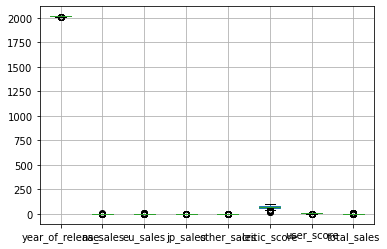

In [41]:
ps4=data.query('platform == "PS4" and year_of_release != 2030')
ps4.boxplot()

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

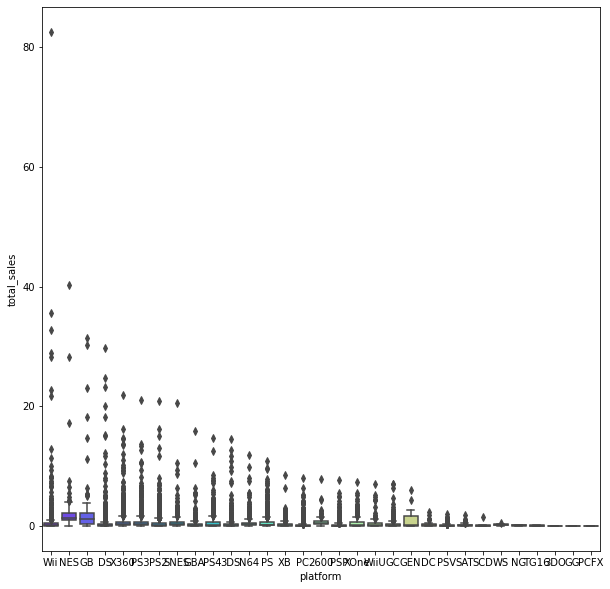

In [26]:
plt.figure(figsize=(10,10))
sns.boxplot (x = 'platform', y = 'total_sales', data = data, palette='rainbow')

In [27]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000,16715.000000
mean,2006.863057,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046,0.533396
std,6.537607,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006,1.548261
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2008.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2011.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2030.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Выбросы появляются на отметке выше 80. От них и нужно избавиться.

In [28]:
#убираем выбросы
data = data[(data['total_sales'] < 80)]

#оставляем период с нормальным распределением 2013-2015
data = data[(data['year_of_release'] > 2013) & (data['year_of_release'] < 2016)]

In [29]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,486.000000,626.000000,1187.000000
mean,2014.510531,0.201457,0.184886,0.062157,0.056563,71.901235,6.620927,0.505063
std,0.500100,0.501396,0.503424,0.236606,0.157106,12.423063,1.551389,1.167734
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.400000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,65.250000,5.800000,0.040000
50%,2015.000000,0.030000,0.030000,0.010000,0.010000,73.000000,7.000000,0.120000
75%,2015.000000,0.165000,0.145000,0.050000,0.040000,81.000000,7.800000,0.440000
max,2015.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


Используем в дальнейшем данные в периоде **2013-2015 год. Это и будет Актуальным периодом**.

### Какие платформы лидируют по продажам, растут или падают?

In [30]:
data['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

В периоде 2013-2015 год с нормальным распределением присутствуют следующие платформы: **PS4, 3DS, XOne, WiiU, PS3, X360, PC, Wii, PSV, PSP.** Изучим поведение этих платформ в выбранном **Актуальном периоде 2013-2015 год**.

In [31]:
future = data[
    (data['platform'] !='PS') & (data['platform'] !='PS2') &
    (data['platform'] !='DS')
]

Теперь построим графики для всех оставшихся платформ.

<AxesSubplot:title={'center':'PS4'}, xlabel='year_of_release'>

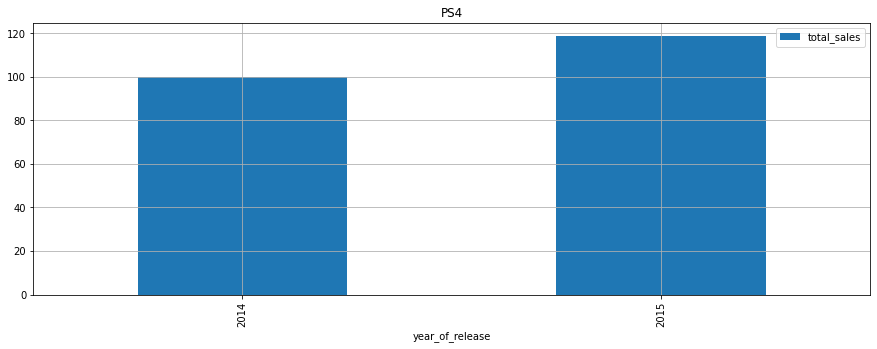

In [32]:
#PS4
future.query('platform == "PS4" and year_of_release != 2030') \
.pivot_table(index='year_of_release', values='total_sales', aggfunc=sum) \
.plot(grid=True, kind='bar',figsize=(15, 5), title='PS4')

**Продажи постепенно растут к 2015 и продолжают рости.**

<AxesSubplot:title={'center':'3DS'}, xlabel='year_of_release'>

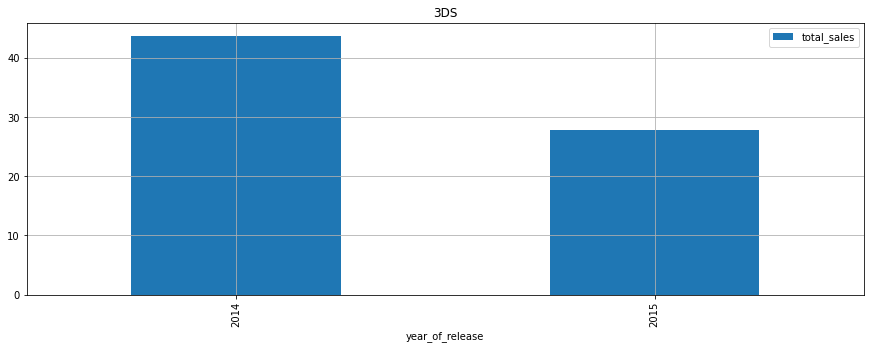

In [33]:
#3DS
future.query('platform == "3DS" and year_of_release != 2030') \
.pivot_table(index='year_of_release', values='total_sales', aggfunc=sum) \
.plot(grid=True, kind='bar',figsize=(15, 5), title='3DS')

Пик пришелся на 2014 год и падает практически вполовину к 2015 году.

<AxesSubplot:title={'center':'XOne'}, xlabel='year_of_release'>

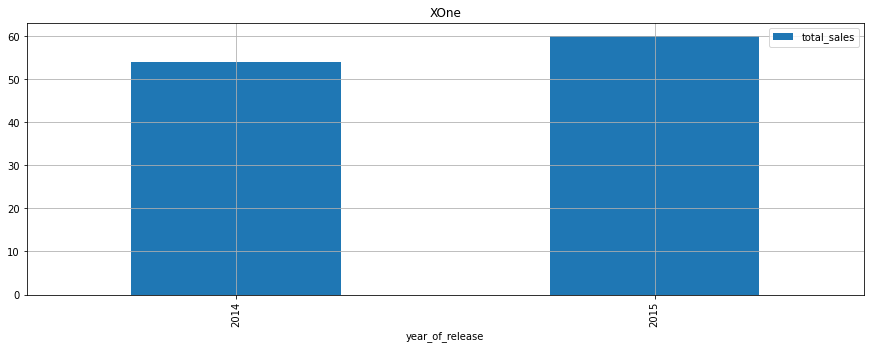

In [34]:
#XOne
future.query('platform == "XOne" and year_of_release != 2030') \
.pivot_table(index='year_of_release', values='total_sales', aggfunc=sum) \
.plot(grid=True, kind='bar',figsize=(15, 5), title='XOne')

**Продажи постепенно растут к 2015 и продолжают рости.**

<AxesSubplot:title={'center':'WiiU'}, xlabel='year_of_release'>

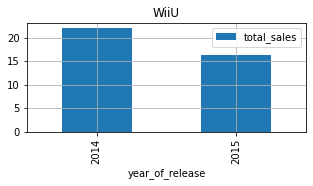

In [35]:
#WiiU
future.query('platform == "WiiU" and year_of_release != 2030') \
.pivot_table(index='year_of_release', values='total_sales', aggfunc=sum) \
.plot(grid=True, kind='bar',figsize=(5, 2), title='WiiU')

Пик пришелся на 2014 год в 22 единицы и начинаетя падение до 16 единиц к 2015 году.

<AxesSubplot:title={'center':'PC'}, xlabel='year_of_release'>

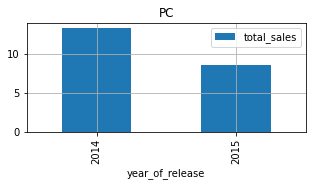

In [36]:
#PC
future.query('platform == "PC" and year_of_release != 2030') \
.pivot_table(index='year_of_release', values='total_sales', aggfunc=sum) \
.plot(grid=True, kind='bar',figsize=(5, 2), title='PC')

Падение к 2015 году.

<AxesSubplot:title={'center':'PSV'}, xlabel='year_of_release'>

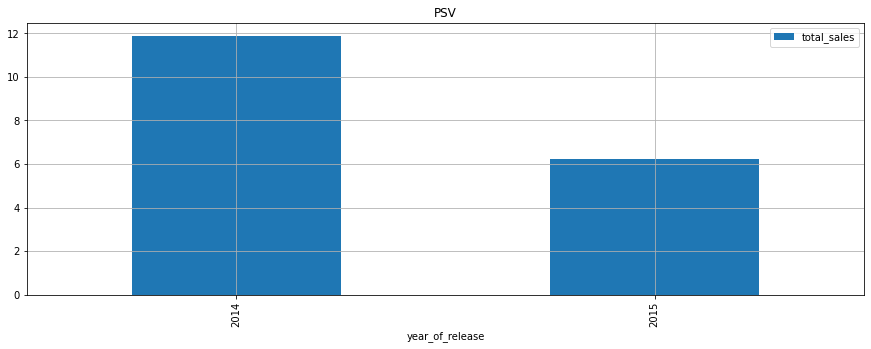

In [37]:
#PSV
future.query('platform == "PSV" and year_of_release != 2030') \
.pivot_table(index='year_of_release', values='total_sales', aggfunc=sum) \
.plot(grid=True, kind='bar',figsize=(15, 5), title='PSV')

Падение к 2015 году практически вполовину.

<AxesSubplot:title={'center':'X360'}, xlabel='year_of_release'>

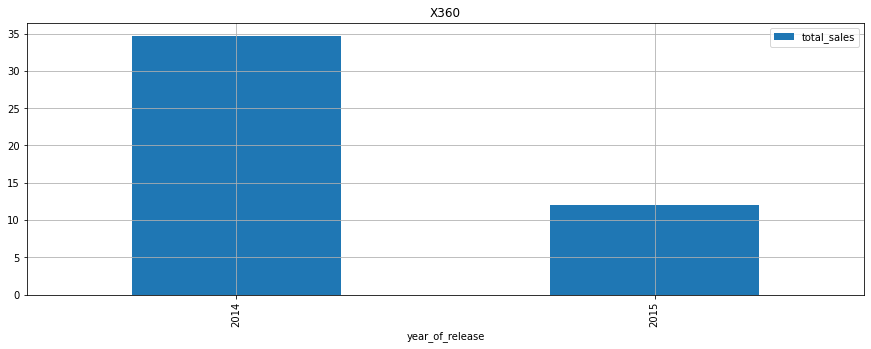

In [38]:
#X360
future.query('platform == "X360" and year_of_release != 2030') \
.pivot_table(index='year_of_release', values='total_sales', aggfunc=sum) \
.plot(grid=True, kind='bar',figsize=(15, 5), title='X360')

Наблюдается резкое падение к 2015 году.

<AxesSubplot:title={'center':'PS3'}, xlabel='year_of_release'>

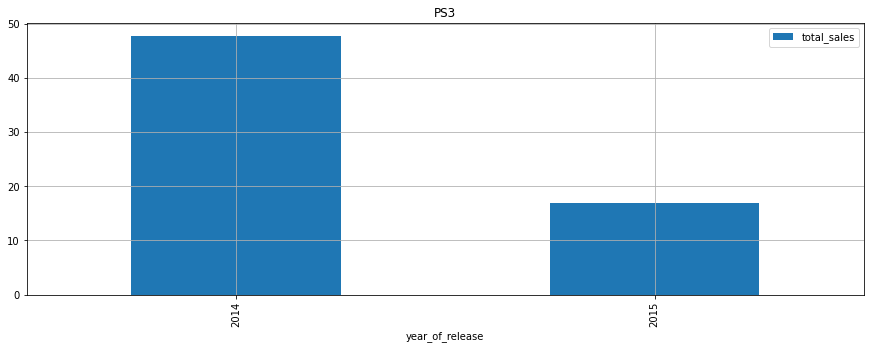

In [39]:
#PS3
future.query('platform == "PS3" and year_of_release != 2030') \
.pivot_table(index='year_of_release', values='total_sales', aggfunc=sum) \
.plot(grid=True, kind='bar',figsize=(15, 5), title='PS3')

Наблюдается резкое падение к 2015 году.

<AxesSubplot:title={'center':'Wii'}, xlabel='year_of_release'>

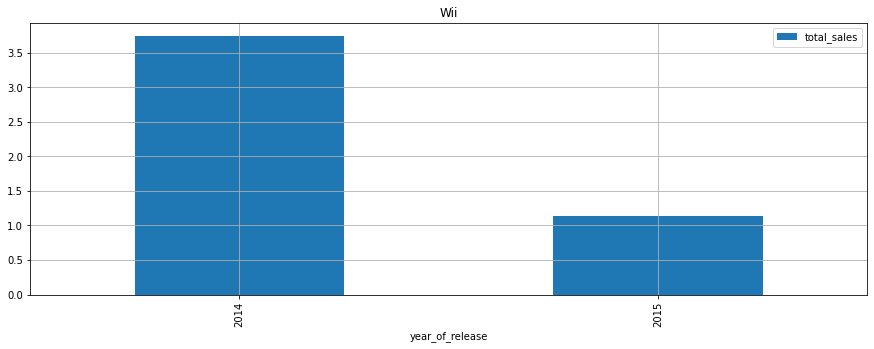

In [40]:
#Wii
future.query('platform == "Wii" and year_of_release != 2030') \
.pivot_table(index='year_of_release', values='total_sales', aggfunc=sum) \
.plot(grid=True, kind='bar',figsize=(15, 5), title='Wii')

Наблюдается резкое падение к 2015 году.

**Вывод: самыми потенциально выгодными платформами стали PS4 и XOne.**

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

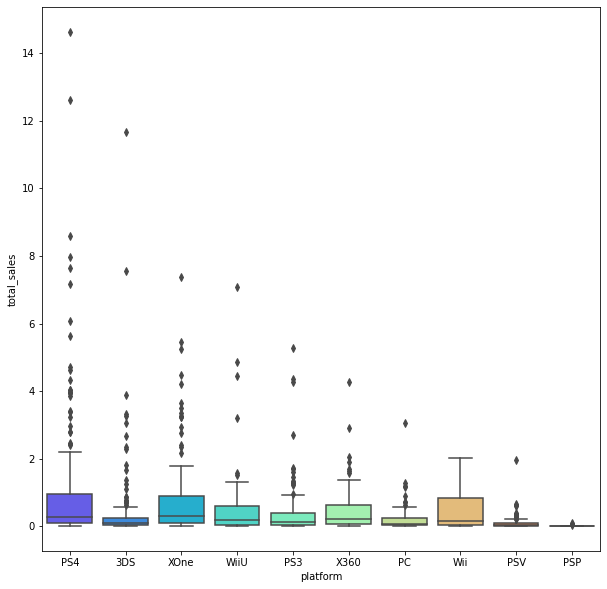

In [41]:
plt.figure(figsize=(10,10))
sns.boxplot (x = 'platform', y = 'total_sales', data = data, palette='rainbow')

Вывод: **Продажи PS4, XOne, Wii самые высокие.**

In [42]:
corr = data[['critic_score', 'user_score', 'na_sales', 'eu_sales', 'jp_sales']].corr()
corr.style.background_gradient(cmap='coolwarm')

,critic_score,user_score,na_sales,eu_sales,jp_sales
critic_score,1.000000,0.537409,0.357488,0.294743,0.143695
user_score,0.537409,1.000000,-0.023225,-0.036794,0.207108
na_sales,0.357488,-0.023225,1.000000,0.758904,0.241507
eu_sales,0.294743,-0.036794,0.758904,1.000000,0.187041
jp_sales,0.143695,0.207108,0.241507,0.187041,1.000000


Линейной зависимости между критиками и продажами практически не наблюдается. Нужно посмотреть графики

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

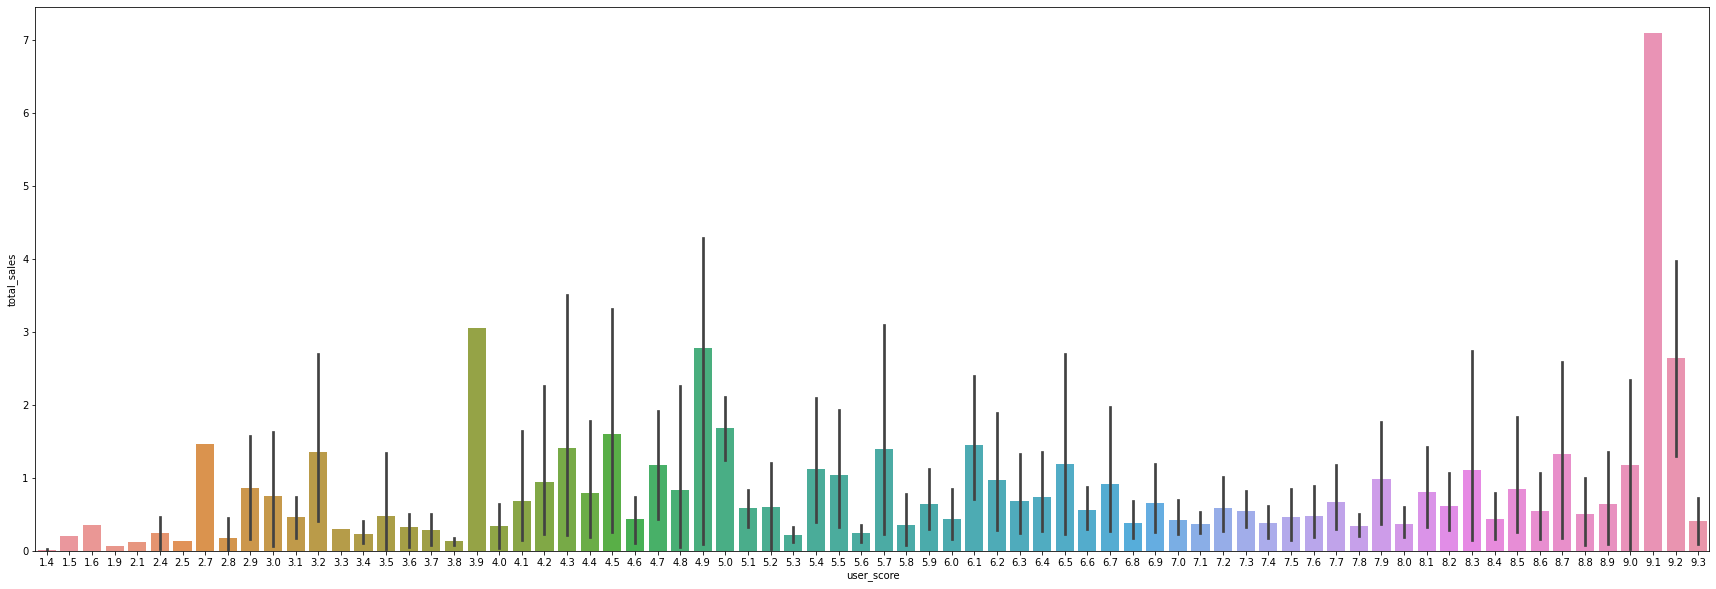

In [43]:
#влияние оценок пользователей
plt.figure(figsize=(30,10))
sns.barplot(data=data, x='user_score', y='total_sales')

Игры с низкими рейтингами имеют как правило невысокие продажи. Игры с более высокими рейтингами более высокие продажи. **Наблюдается зависимость.**

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

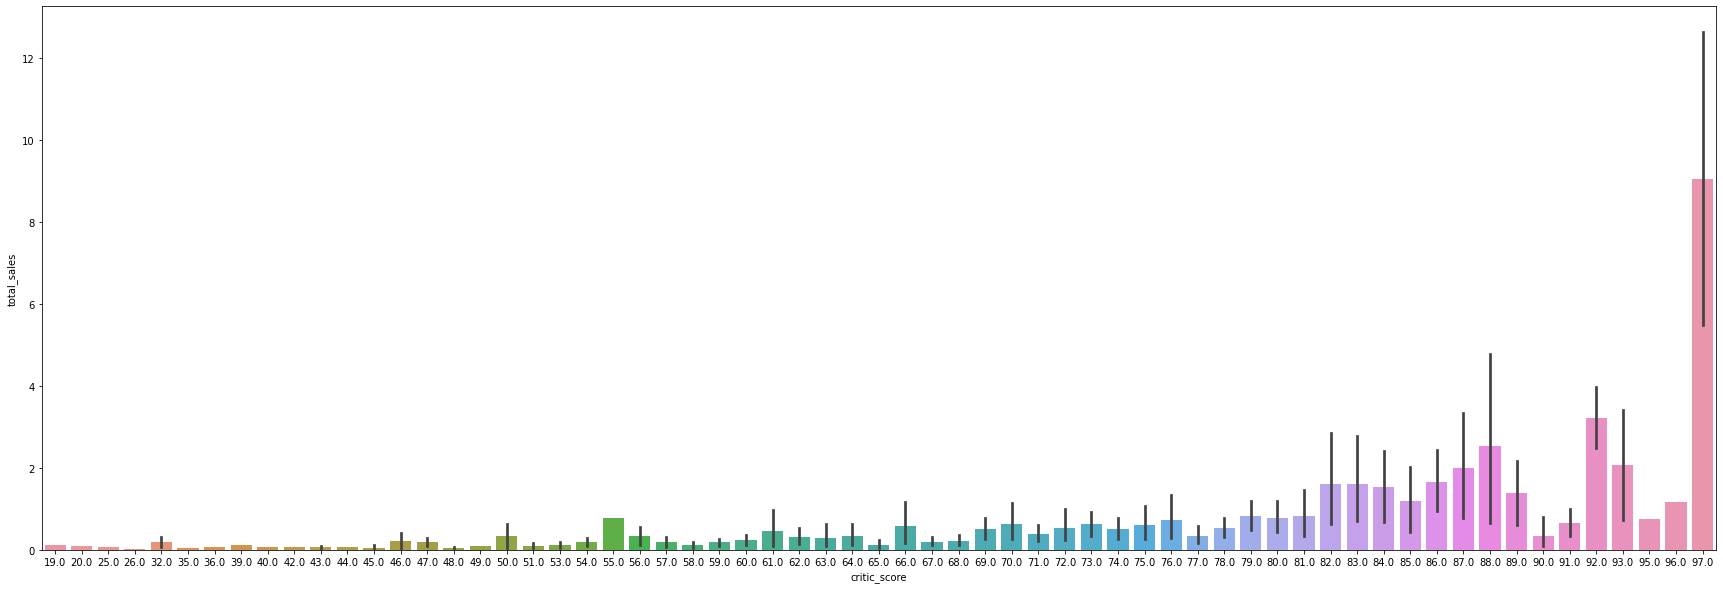

In [44]:
#влияние оценок критиков
plt.figure(figsize=(30,10))
sns.barplot(data=data, x='critic_score', y='total_sales')

Чем выше оценка критика тем больше продаж. **Наблюдается высокая зависимость.**

**Вывод: наибольшая зависимость наблюдается между оценками критиков и продажами, между оценками пользователей и продажами так же наблюдается, но не такая высокая. Значит мнения критиков и пользователей не всегда совпадают.** 

### Соотнесем выводы с продажами игр на других платформах.

Text(0.5, 1.0, 'Продажи по платформам')

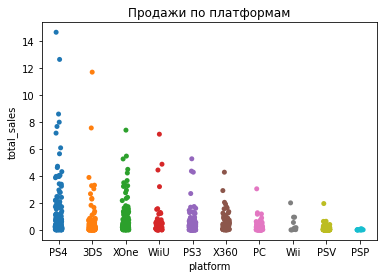

In [45]:
sns.stripplot(x = 'platform', y = 'total_sales', data = data)
plt.title('Продажи по платформам')

Наибольшее распределение по продажам имеют платформы: **PS4, 3DS**.

<AxesSubplot:xlabel='genre'>

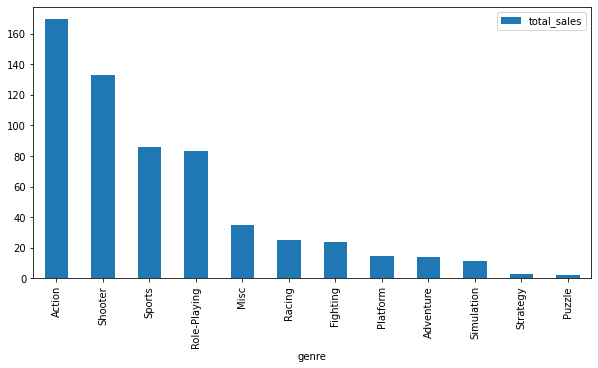

In [46]:
#какие жанры наиболее продаваемы в общем
data.groupby(by='genre') \
.agg({'total_sales':'sum'}) \
.sort_values(by='total_sales', ascending=False) \
.plot(kind='bar', figsize=(10,5))

<AxesSubplot:xlabel='genre'>

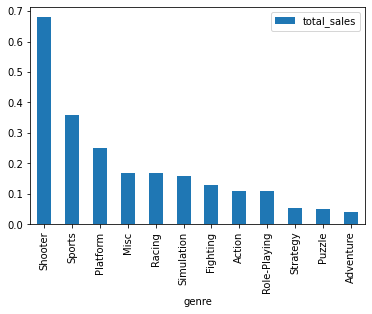

In [47]:
#просмотр средних показателей по продажам и жанрам
data.pivot_table(index='genre', values='total_sales', aggfunc='median') \
.sort_values(by='total_sales', ascending=False).plot(kind='bar')

Вывод: **Топ-5 жанров по медианным показателям являются Shooter, Sports, Platform, Misc, Racing. Наименее продаваемыми являются Strategy, Puzzle, Adventure**.

## Составим портрет пользователя каждого региона

### Определим для пользователя каждого региона (NA, EU, JP):

#### Самые популярные платформы (топ-5). 

,eu_sales
platform,
PS4,98.26
XOne,36.62
PS3,24.28
X360,14.78
PC,14.44


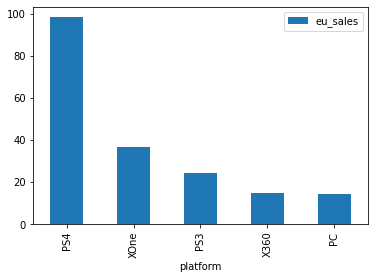

In [48]:
# топ-5 европейского региона
data.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False) \
.head(5).plot(kind='bar')

data.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False) \
.head(5)

Вывод: **В топ-5 Европейского региона находятся платформы: PS4(98,26 млн), XOne(36,62 млн), PS3(24,28 млн), X360(14,78 млн), PC(14,44 млн)**.

,na_sales
platform,
PS4,77.12
XOne,67.00
X360,27.61
PS3,21.38
3DS,18.50


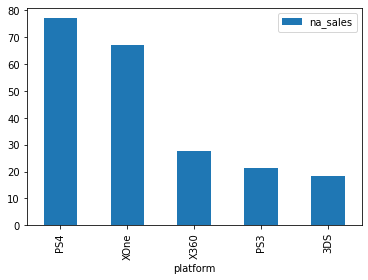

In [49]:
# топ-5 Северной Америки
data.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False) \
.head(5).plot(kind='bar')

data.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False) \
.head(5)

Вывод: **В топ-5 Северной Америки находятся платформы: PS4(77,12 млн), XOne(67 млн), X360(27,61 млн), PS3(21,38 млн), 3DS(18,5 млн).**

,jp_sales
platform,
3DS,36.21
PSV,10.98
PS3,9.92
PS4,9.28
WiiU,6.64


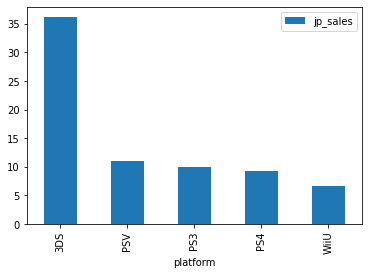

In [50]:
# топ-5 Японского региона
data.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False) \
.head(5).plot(kind='bar')

data.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False) \
.head(5)

Вывод: **В топ-5 Японского региона находятся платформы: 3DS(36,21 млн), PSV(10,98 млн), PS3(9,92 млн), PS4(9,28 млн), WiiU(6,64 млн).**

Общий вывод по платформам: **В Северной Америке и Европе идет борьба между платформами PS4 и XOne, а вот в Японии популярностью пользуются все платформы местного производства, причем первые места делят именно портативные платформы в отличие от Америки и Европы. При всем при этом, судя по продажам, Японский регион является наименее играющим из исследуюемых, а Американский наиболее играющим**.

#### Cамые популярные жанры (топ-5). Поясните разницу.

,eu_sales
genre,
Action,64.00
Shooter,49.62
Sports,33.72
Role-Playing,23.89
Racing,12.36


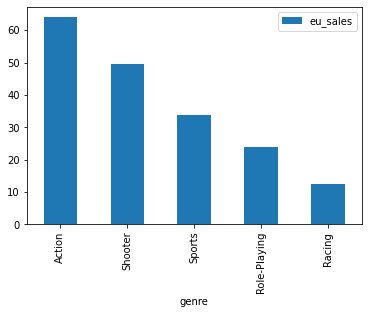

In [51]:
# топ-5 европейского региона
data.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False) \
.head(5).plot(kind='bar')

data.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False) \
.head(5)

Вывод: **В Европе наиболее популярными жанрами являются Action(64 млн), Shooter(49,62 млн), Sports(33,72), Role-Playing(23,89 млн), Racing(12,36 млн)**.

,na_sales
genre,
Action,63.24
Shooter,62.78
Sports,38.59
Role-Playing,27.58
Misc,14.29


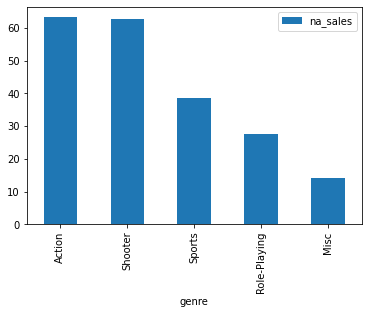

In [52]:
# топ-5 Северной Америки
data.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False) \
.head(5).plot(kind='bar')

data.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False) \
.head(5)

Вывод: **В Северной Америке наиболее популярными жанрами стали: Action(63,24 млн), Shooter(62,78 млн),Sports(38,59 млн), Role-Playing(27,58 млн), Misc(14,29 млн)**.

,jp_sales
genre,
Role-Playing,24.55
Action,22.51
Fighting,5.62
Misc,4.57
Shooter,3.81


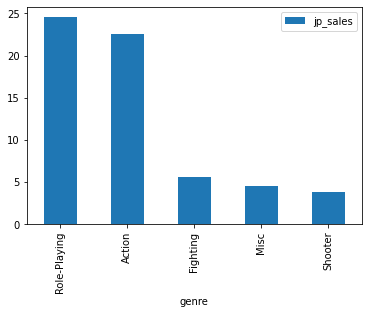

In [53]:
# топ-5 Японского региона
data.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False) \
.head(5).plot(kind='bar')

data.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False) \
.head(5)

Вывод: **В Японском регионе наиболее популярными жанрами стали: Role-Playing(24,55 млн), Action(22,51 млн), Fighting(5,62), Misc(4,57), Shooter(3,81)**.

Общий вывод: **В Европе и Северной Америке золото и серебро поделили Action и Shooter(3 место-Sports), а в Японии Role-Playing и Action(3 место-Fighting). Это связано с Аниме культурой, которая очень популярна в Японии**. 

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

,eu_sales
rating,
M,76.90
,51.48
E,44.45
T,24.28
E10+,22.35


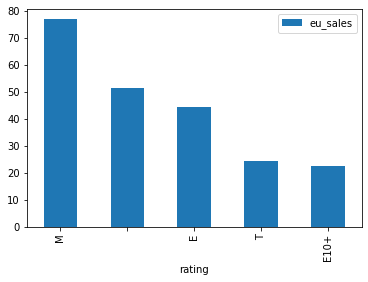

In [54]:
# топ-5 европейского региона
data.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False) \
.head(5).plot(kind='bar')

data.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False) \
.head(5)

Вывод: **В Европе наиболее продаваемыми стали игры с рейтингами: M, "без рейтинга", E, T, E10+**.

,na_sales
rating,
M,80.75
,56.19
E,42.77
T,30.00
E10+,29.42


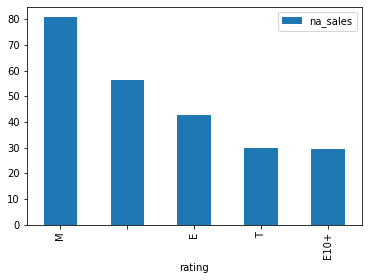

In [55]:
# топ-5 Северной Америки
data.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False) \
.head(5).plot(kind='bar')

data.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False) \
.head(5)

Вывод: **В Северной Америке наиболее продаваемыми стали игры с рейтингами: M, "без рейтинга", E, T, E10+**.

,jp_sales
rating,
,42.58
T,12.51
E,7.87
M,6.81
E10+,4.01


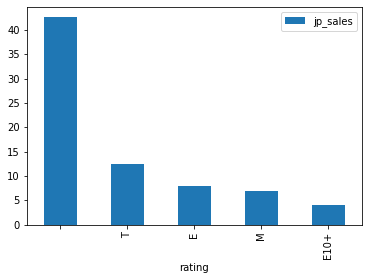

In [56]:
# топ-5 Японского региона
data.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False) \
.head(5).plot(kind='bar')

data.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False) \
.head(5)

Вывод: **В Японии наиболее продаваемыми стали игры с рейтингами: без рейтинга, T, E, M, E10+**.

Общий вывод: **В Европе и Америке рейтинги популярных игр одинаковые ( на первых местах M -"Для взрослых","Без рейтинга", E- "Для всех", T - "Для подростков", E10+ -"Для всех от 10 и старше"), а в Японии пальму первенства держат игры "Без рейтинга". Возможно это связано с трудностями локализаций на данном рынке.**


## Проверим гипотезы


***
**Н0. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

**Н1. Средние пользовательские рейтинги платформ Xbox One и PC разные.**
***

In [57]:
#рейтинги пользователей по XOne
XOne = data[(data['platform'] == 'XOne') & (data['user_score'] > 0)]['user_score']

#рейтинги пользователей по PC
PC = data[(data['platform'] == 'PC') & (data['user_score'] > 0)]['user_score']

# проверка дисперсий
print("Дисперсия XOne равна:", np.var(XOne, ddof=1))
print("Дисперсия PC равна:", np.var(PC, ddof=1))

Дисперсия XOne равна: 1.5960564831993405
Дисперсия PC равна: 2.8661825017088174


Дисперсии 2 выборок неравны, тогда используем распределение Стьюдента.

In [58]:
# проверка гипотез
alpha = 0.05
results = st.ttest_ind(XOne, PC, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
    
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2064150169331124
Не получилось отвергнуть нулевую гипотезу


***
**Но. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.**

**Н1. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**
***

In [59]:
#рейтинги пользователей по жанру Action
action = data[(data['genre'] == 'Action') & (data['user_score'] > 0)]['user_score']

#рейтинги пользователей по жанру Sports
sports = data[(data['genre'] == 'Sports') & (data['user_score'] > 0)]['user_score']

# проверка дисперсий
print("Дисперсия Action равна:", np.var(action, ddof=1))
print("Дисперсия Sports равна:", np.var(sports, ddof=1))

Дисперсия Action равна: 1.791948493248681
Дисперсия Sports равна: 3.1705168539325843


Дисперсии 2 выборок неравны, тогда используем распределение Стьюдента.

In [60]:
# проверка гипотез
alpha = 0.05
results = st.ttest_ind(action, sports, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
    
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.639159825656943e-13
Отвергаем нулевую гипотезу


Вывод: **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

## Общий вывод

* *Наиболее продаваемыми стали игры на платформе PS2(1255.77), X360(971.42), PS3(939.65), после уже Wii(907.51), DS(806.12).*

* Пик продаж для PS2 пришелся на период 2002-2004 года, после чего начался спад.
* Пик продаж для X360 пришелся на период 2009-2010 года, после начался спад.
* Пик продаж для PS3 пришелся на период 2008-2011 года, после начался спад, с небольшим подьемом в 2013.
* Пик продаж для DS пришелся на период 2004-2007 года, после начался спад.
* Пик продаж для Wii пришелся на 2009 год, после начался резкий спад.
***

**Cрок жизни платформ периода 2006-2016 годов (14 лет) выше чем у платформ периода 1980-2000 года (9,6 лет). Многие кампании перевыпустили свои платформы, заменив их старых собратьев( Sony PS заменили PS2, PS2 на PS3, Nintendo NES на SNES).**
***
* Cамыми потенциально выгодными платформами стали PS4 и XOne.
* Наибольшая зависимость наблюдается между оценками критиков и продажами, между оценками пользователей и продажами так же наблюдается, но не такая высокая.
* Топ-5 жанров по медианным показателям являются **Shooter, Sports, Platform, Misc, Racing**. Наименее продаваемыми являются **Strategy, Puzzle, Adventure**
* В Северной Америке и Европе идет борьба между платформами PS4 и XOne, а вот в Японии популярностью пользуются все платформы местного производства, причем первые места делят именно портативные платформы в отличие от Америки и Европы. При всем при этом, судя по продажам, Японский регион является наименее играющим из исследуюемых, а Американский наиболее играющим.
* В Европе и Северной Америке золото и серебро поделили Action и Shooter(3 место-Sports), а в Японии Role-Playing и Action(3 место-Fighting). Это связано с Аниме культурой, которая очень популярна в Японии. 
* В Европе и Америке рейтинги популярных игр одинаковые ( на первых местах M -"Для взрослых","Без рейтинга", E- "Для всех", T - "Для подростков", E10+ -"Для всех от 10 и старше"), а в Японии пальму первенства держат игры "Без рейтинга". Возможно это связано с трудностями локализаций на данном рынке.
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.